In [1]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statistics
import math
import random
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Import, and slice data (2nd sample group first 100 responses from revised survey, not including 1st sample group of 20)

df = pd.read_csv("UMass Sustainability Initiative.csv", sep=",")


In [3]:
#basic data analysis for quantitive data, habits and age distribution

def distribution(df):
    print(f'The mean is {df.mean()} the Standard Erorr of the mean is {stats.sem(df, axis=None, ddof=0)}')
    print(f'The variance is {statistics.variance(df)} the standard deviation is {df.std()}')
    print(f'The min is {df.min()}, Q1 is {np.quantile(df, .25)}, median is {df.median()}, Q3 is {np.quantile(df, .75)}, max is {df.max()}')
    print(f'Skewness: {stats.skew(df)}')
    first_quartile = np.quantile(df, .25)
    third_quartile = np.quantile(df, .75)
    IQR = third_quartile - first_quartile 
    low_value = first_quartile - (IQR * 1.5)
    high_value = third_quartile + (IQR * 1.5)
    outliers = []
    outliers.clear
    for i in df:
        if low_value > i:
            outliers.append(i)
        elif high_value < i:
            outliers.append(i)
    outliers.sort()
    print(f'Outliers: {outliers}')
        
#distribution(df['Habits'])



In [4]:
#Data Cleaning

df.rename(columns = {'How old are you?':'Age', 'What is your gender?':'Gender', 'What occupation do you hold in the University?':'Occupation',
                     'What year are you?':'Year', 'What is your major?':'Major',
                     'Do you live on campus?':'On Campus', 'If you do live on campus, where do live?':'Location',
                     'How often do you recycle?':'Frequency', "Why do you recycle? (Don't answer if you don't)":'Reasoning',
                     'Are the recycling rules on campus clearly presented?':'Rules', 
                     'If not, if the recycling rules were clearer would you be more likely to recycle?':'Likelihood',
                     'Do you look for the recycle symbol before recycling?':'Symbol', 'What items do you usually recycle?':'Items',
                     'Did the survey overall make you think about your own personal recycling methods and habits?':'Habits',
                     'Whats the best way to reach you for the prize draw? (Email, Phone, etc. )':'Prize'}, inplace = True)

#fill with None?
#df.fillna(None, inplace=True)

#Splitting strings into arrays, not actually useful! Strings have useful methods see electronics cell below
#df['Reasoning'] = df['Reasoning'].str.split(";", expand = False)
#df['Items'] = df['Items'].str.split(";", expand = False)

df['Reasoning'].fillna('Nothing', inplace = True) 

#Gender data cleaning...
df['Gender'].replace(to_replace = "Goblin", value = "other", inplace = True) 

df['Occupation'][0:277] = 'Student'
df['Occupation'][260] = 'Faculty'
print(df['Occupation'][260])
print(df['Major'][277]) 
#age data cleaning....
df['Age'].replace(to_replace = "Twenty", value = int(20), inplace = True) 
df['Age'].replace(dict.fromkeys(['I am banes', 'RECYCLING IS FOR NERDS'], int(20)), inplace = True)
df['Age'][367] = 18
df['Age'][235] = 20 
#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
df['Major'].replace(dict.fromkeys(['CS', 'CIS', 'Computer Science', 'Computer science', 'Computer science', 'Comp sci', 'Comp Sci', 
                                   'COMPUTER SCIENCE', 'Computer Science', 'Computer Science ','Civil Engineering ', 'Computer science ', 'Mechanical engineering', 
                                   'Computer Engineering', 'Electrical engineering', 'Data Science', 'Electrical Engineering ', 'Bioengineering ', 'Bioengineering', 'Bio engineering ',
                                   'Mechanical engineering ', 'Mechanical Engineering ', 'Computer engineering ', 'Computer Engineering ', 'Electrical engineering ', 'Electrical and Computer Engineering',
                                   'Data Science !', 'Engineering ', 'Software Engineering', 'Mechanical engineer ', 'Civil engineering', 'MNE', 'DSC', 'DS', 'Physics','mechanical engineer',  
                                   'Mechanical Engineering', 'Electrical Engineering', 'Data Science ', 'Civil engineering ', 'civil engineering '], 
                                   'CoE'), inplace = True)

df['Major'].replace(dict.fromkeys(['MIS', 'Accounting', 'Accounting ', 'Marketing', 'Marketing ', 'Finance', 'Finance ', 'Mls ', 'MLS','accounting', 'Management ', 'Management', 
                                   'Business', 'Buisness', 'Business management ', 'Business Management ', 'Business Management', 'Business administration ', 'Business Marketing ', 'Marketinf', 'MBA', 
                                   'BUS MGT', 'Management Information Systems', 'Management of Information Systems ', 'Operations management', 'Acocunting', 'Business ', 'Healthcare Management '], 'CoB'), inplace = True)

df['Major'].replace(dict.fromkeys(['Biology ', 'Biology', 'Biology <3', 'Marine biology ', 'Economics', 'CJS ', 'CJS', 'cjs','Psychology ', 'psychology', 'Psychology', 'Psych ', 'Psc', 'Psy',
                                   'Political science', 'Political Science ', 'political science ', 'Crime & justice', 'Political science ', 'Political Science', 'health and society ', 'Philosophy', 'History ', 'History',
                                   'Crime And Justice ', 'Crime and Justice ', 'Crime and Justice Studies', 'Math', 'English: writing and rhteoric', 'Psychology and Health and Society', 'Political Science & Health and Society', 'Mathematics',
                                   'Health and Society ', 'Health and society ', 'sociology and anthropology ', 'Sociology and Anthropology', 'WGS', 'Biochemistry ', 'Biochem', 'ECO/PSC', 'Psych/Pre-med', 
                                   'Bio', 'Health & Society', 'Chemistry', 'Marine bio', 'Sociology ', 'Liberal arts ', 'English', 'crime and justice studies', 'Engish', 'economics ', 'biology', 'Sociology and anthropology ', 'Spanish ', 'Marine biology',
                                   'Chemistry ', 'Sexual education', 'STEM Education', 'Leadership ', 'Psychology and English Literature '], 'CAS'), inplace=True)

df['Major'].replace(dict.fromkeys(['Undeclared ', 'undeclared', 'Engineering Undeclared ', 'Engineering undeclared ', 'Business Undeclared', 'Arts and sciences undeclared ', 'Business undeclared ', 'Arts & Sciences Undeclared ', 'Undecided'], 'Undeclared'), inplace=True)

df['Major'].replace(dict.fromkeys(['Eating Ass', 'Homology ', 'Iâ€™m a professor', 'I’m a professor','Smd ', 'Rocks', 'Butts ','BT'], 'Other'), inplace=True)

df['Major'].replace(dict.fromkeys(['Nursing', 'Nursing ', 'nursing ', 'nursing', 'ABSN', 'Pre med post bac', 'Medical laboratory science ', ], 'CNHS'), inplace=True)

df['Major'].replace(dict.fromkeys(['Visual Arts', 'Graphic Design', 'Interior Architecture + Design', 'Interior architecture and design ', 'Interior Architecture and Design', 'Interior Architecture ',
                                   'art history', 'Graphic design', 'Graphic design ', 'Painting', 'Music Education', 'Graphic Design ', 'AGA', 'IAD', 'Digital Media', 'Fashion Designer ', 'Illustration', 'Architecture ', 'Animation ', 'Fashion Design'], 'CVPA'), inplace=True)

df['Rules'].replace(dict.fromkeys(["I didn't know there were any recycling rules!"], "Rules?"), inplace = True)

df['Location'].replace(dict.fromkeys(['Chestunut'], 'Chestnut'), inplace=True)
#focus group 1 is now df1g
df1 = df.iloc[0:100]

df.head(3)

Faculty
Data Science


C:\Users\Gibson Brash\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gibson Brash\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gibson Brash\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gibson Brash\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: Settin

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
0,2020/02/18 4:03:42 PM AST,20,Male,Student,Sophomore,CoE,Yes,Birch,Often,Sustainability;Ease of Access,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,3,NaN
1,2020/02/18 4:05:49 PM AST,20,Male,Student,Junior,CoE,Yes,Aspen,Always,Sustainability;Habit,No,Yes,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,jegan2@umassd.edu
2,2020/02/18 4:09:10 PM AST,23,Male,Student,Junior,CoE,No,NaN,Always,Habit,Yes,NaN,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,2,NaN


In [5]:
#CONFIDENCE INTERVAL FOR FREQUENCY OF RECYCLING
#repacling all strings with ints in NEW dataframe column
#if you want to use for the WHOLE data set, change df to whatever the name is of the dataframe
#that contains all 446 participants
df.Age = df.Age.astype(int)
df['Frequency_as_int'] = df['Frequency']    
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Always', 5)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Often', 4)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Sometimes', 3)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Rarely', 2)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Never', 1)
#function: mean +- z (of alpha/2) * (std dev/ sqrt(n))
frequency_mean = df['Frequency_as_int'].mean()
frequency_std_div = df['Frequency_as_int'].std()
#using the equation we get 1-((1 - 95)/2)
#z_score is 1.96 for 95 percent confidence
z_score = 1.96
divisor = math.sqrt(len(df))
confidence = z_score * (frequency_std_div/divisor)
print('we are 95% confident that the interval', confidence+frequency_mean, 'to', frequency_mean-confidence, 'contains the population mean based on the sample set')

#CONFIDENCE INTERVAL FOR HOW OFTEN DO PEOPLE RECYCLE (97 PERCENT) FOLLOWED BY CONFIDENCE INTERVAL FOR AGE (87%)
#computing alpha/2 first to calculate z score
z_score = 2.17
age_confidence = .87
divisor = math.sqrt(len(df))
confidence = z_score * (frequency_std_div/divisor)
print('we are 97% confident that the interval', confidence+frequency_mean, 'to', frequency_mean-confidence, 'contains the population mean based on the sample set')

age_mean = df['Age'].mean()
age_std_div = df['Age'].std()
alpha = 1-age_confidence
alpha = alpha/2
alpha = 1- alpha
print('alpha is', alpha)
z_score = 1.52
confidence = z_score * (age_std_div/divisor)
print('we are 87% confident that the interval', confidence+age_mean, 'to', age_mean-confidence, 'contains the age mean based on the sample set')

we are 95% confident that the interval 4.0398538043813605 to 3.8570071821657246 contains the population mean based on the sample set


In [6]:
#Pick a random winner for the prize
# df[random.randint(1, len(df))], first attempt doesn't work
df.loc[df.index == random.randint(1, len(df))]


,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )",Frequency_as_int
371,2020/02/26 2:27:23 PM AST,20,Female,Student,Sophomore,CoE,Yes,Hickory,Often,Sustainability;Habit,Rules?,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,kpeterson2@umassd.edu,4


In [7]:
# age data analysis, pain in the neck
#df['Age'].fillna(method = 'ffill')
#df.reset_index(drop=True)
#df['Age'].dtype #object type
df['Age'].value_counts()
df1.Age = df1.Age.astype(int)
df.Age = df.Age.astype(int)
#print(df['Age'].mean(skipna=True))
correlate = np.corrcoef(df['Age'], df['Frequency_as_int'])
print(f'Correlation: {correlate}')
distribution(df['Age'])

Correlation: [[1.         0.02224993]
 [0.02224993 1.        ]]
The mean is 20.923766816143498 the Standard Erorr of the mean is 0.170925094004379
The variance is 13.059343981458156 the standard deviation is 3.6137714345899297
The min is 17, Q1 is 19.0, median is 20.0, Q3 is 21.0, max is 50
Skewness: 4.463309266343239
Outliers: [25, 25, 25, 25, 25, 25, 25, 26, 27, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29, 30, 30, 31, 33, 33, 33, 35, 42, 45, 45, 47, 50]


C:\Users\Gibson Brash\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
# habits data analysis, luckily a lot easier
#print(df['Habits'].mean(skipna=True))

distribution(df['Habits'])
df['Habits'].value_counts()


The mean is 3.820627802690583 the Standard Erorr of the mean is 0.04991749634132685
The variance is 1.113820728573588 the standard deviation is 1.05537705516729
The min is 1, Q1 is 3.0, median is 4.0, Q3 is 5.0, max is 5
Skewness: -0.8778922187614709
Outliers: []


4    172
5    129
3    103
1     22
2     20
Name: Habits, dtype: int64

In [9]:
#basic data analysis for qualtitve data, Major Location Frequency Reasoning Items ... etc

#to be filled in...

In [10]:
#Sorting entries (potential group of interest could be people with low habits, majority of people had high schore for habits)

df.sort_values('Major', ascending=True)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )",Frequency_as_int
216,2020/02/19 2:58:05 PM AST,19,Female,Student,Sophomore,CAS,Yes,Pine Dale,Often,Sustainability,No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles,2,NaN,4
201,2020/02/19 2:34:18 PM AST,20,Female,Student,Junior,CAS,Yes,Willow,Often,Sustainability,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,5,akane3@umassd.edu,4
335,2020/02/25 5:33:45 PM AST,21,Male,Student,Senior,CAS,No,NaN,Always,Sustainability;Habit,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles,3,dbotelho4@umassd.edu,5
334,2020/02/25 5:33:36 PM AST,21,Female,Student,Senior,CAS,No,NaN,Sometimes,Ease of Access,Yes,Yes,Yes,Paper;Plastic Bottles,3,coralperry1998@gmail.com,3
333,2020/02/25 5:32:30 PM AST,21,Female,Student,Sophomore,CAS,Yes,Dells,Sometimes,Sustainability;Habit,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles,3,sbonilla@umassd.edu,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020/02/26 4:57:23 PM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit;Concern fo...,Rules?,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,3,9783824947,4
398,2020/02/27 5:52:42 PM AST,22,Female,Student,Graduate,NaN,Yes,Ivy,Often,Ease of Access,Yes,NaN,Yes,Cardboard;Plastic Bottles;Plastic Bags,4,9125321665,4
405,2020/02/28 10:18:50 AM AST,21,Female,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Habit,No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags,5,victoria2222222@gmail.com,4
416,2020/03/02 11:06:52 AM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit,Rules?,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,4,9783824947,4


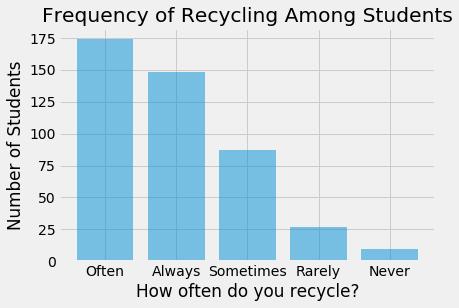

In [11]:
#Initial data analysis with Bar plots on recycling frequency (Focus Group Students)
#we can assume that all first 100 surveys are students since we manually surveyed students with QR codes on our phones

plt.style.use('fivethirtyeight')
x = np.arange(5)

plt.bar(x, df['Frequency'].value_counts(), align='center', alpha=0.5)
plt.xticks(x, ('Often', 'Always', 'Sometimes', 'Rarely', 'Never'))
plt.title('Frequency of Recycling Among Students')
plt.xlabel('How often do you recycle?')
plt.ylabel('Number of Students')
plt.show()
#cumulative frequency would be cool on the graph above, Pareto Chart

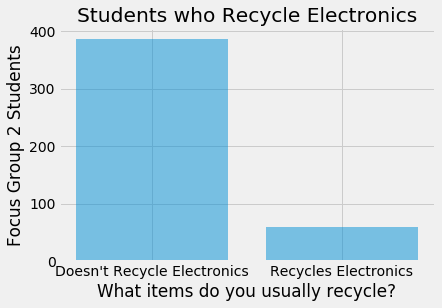

In [12]:
#Data analysis on Items column, specifically electronic subset

AC = df.Items.str.contains(pat = 'Electronics') 
#AC.value_counts().plot(kind='bar'), same as code below without formatting

x = np.arange(2)

plt.bar(x, AC.value_counts(), align='center', alpha=0.5)
plt.xticks(x, ("Doesn't Recycle Electronics", 'Recycles Electronics'))
plt.title('Students who Recycle Electronics')
plt.xlabel('What items do you usually recycle?')
plt.ylabel('Focus Group 2 Students')
plt.show()

#df1.Items.value_counts()

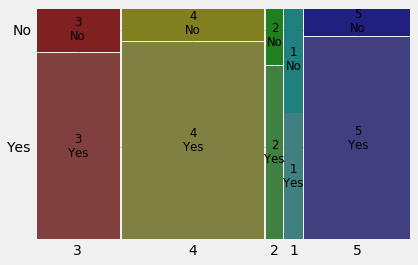

In [13]:
#mosaic plot
m = df.groupby(["Symbol", "Likelihood"]).sum()

mosaic(df, ["Habits", "Symbol"])
plt.show()

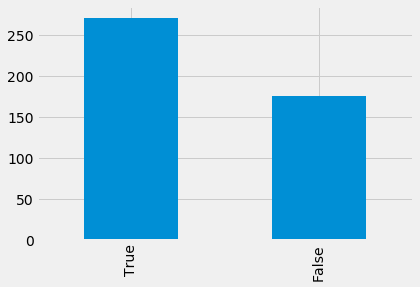

In [14]:
#Data analysis on Reasoning column specifically how manuy people put 'Sustainability' as a reason for them recycling 

df1 = df.Reasoning.str.contains(pat = 'Sustainability')
df1.value_counts()
df1.value_counts().plot(kind='bar')
pl1 = df.Reasoning.str.contains('Sustainability').sum()

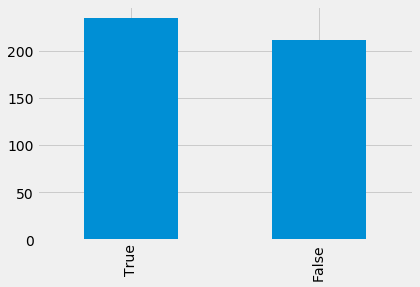

In [15]:
#Data analysis on Reasoning column specifically how manuy people put 'Habit' as a reason for them recycling 
df2 = df.Reasoning.str.contains(pat = 'Habit')
df2.value_counts()
df2.value_counts().plot(kind='bar')
pl2 = df.Reasoning.str.contains('Habit').sum()
#print(df.Reasoning.str.contains('Habit').sum())    

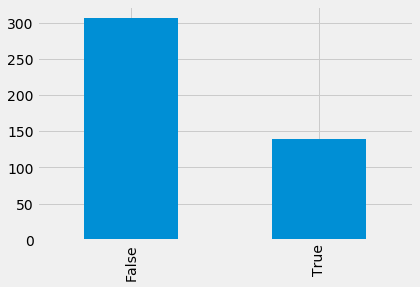

In [16]:
#Data analysis on Reasoning column specifically how manuy people put 'Ease of Access' as a reason for them recycling 
df3 = df.Reasoning.str.contains(pat = 'Ease of Access')
df3.value_counts()
df3.value_counts().plot(kind='bar')
pl3 = df.Reasoning.str.contains('Ease of Access').sum()
#print(df.Reasoning.str.contains('Ease of Access').sum())

271


Text(0.5, 0, 'Reasons for Recycling')

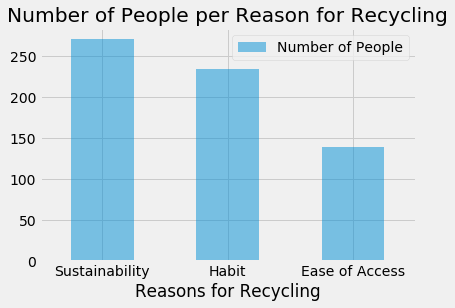

In [17]:
#prints graph of how many people chose what their reason is for recycling 
#there is more than 100 answers because people could choose more than one thing, to my detriment
print(df.Reasoning.str.contains('Sustainability').sum())    

df4 = pd.DataFrame({'Reasons for Recycling':['Sustainability', 'Habit', 'Ease of Access'], 'Number of People':[pl1, pl2, pl3]}) 
ax = df4.plot.bar(x='Reasons for Recycling', y='Number of People', rot=0, alpha=.5)
ax.set_title('Number of People per Reason for Recycling')
ax.set_xlabel('Reasons for Recycling')

[None, None, None, None, None, None, None, None, None, None]

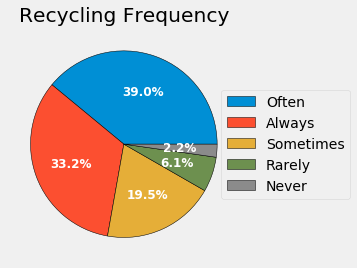

In [18]:
#Jonas' Distaster Area 2.0
#plt.style.use('classic')
#Recycling Frequency Pie Chart

fig1, ax1 = plt.subplots()
labels = df['Frequency'].value_counts().index.tolist()

wedges, texts, autotexts = ax1.pie(df['Frequency'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax1.set_title('Recycling Frequency')

ax1.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), labels= labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students per Gender')

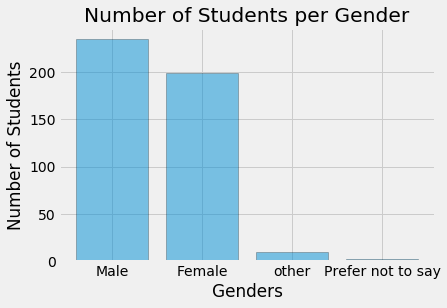

In [19]:
#Gender Bar Graph
fig3, ax3 = plt.subplots()
x = df['Gender'].value_counts().index.tolist()
y = df['Gender'].value_counts().tolist()
ax3.bar(x, y, edgecolor='black', alpha=.5)


ax3.set_axisbelow(True)
ax3.set_xlabel('Genders')
ax3.set_ylabel('Number of Students')
ax3.set_title('Number of Students per Gender')

Text(0.5, 1.0, 'Distribution of Ages')

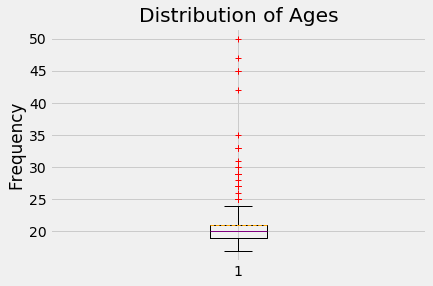

In [20]:
#Age Box Plot
fig4, ax4 = plt.subplots()
medianprops = dict(color='purple')
meanprops = dict(color='orange')

ax4.boxplot(df['Age'], meanline=True, showmeans=True, sym='r+', medianprops=medianprops, meanprops=meanprops)

ax4.set_axisbelow(True)
ax4.set_xlabel('')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Ages')

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('Yes', 'Yes'),
               (0.0, 0.0, 0.3673788431474726, 0.8270304658231427)),
              (('Yes', 'No'),
               (0.0,
                0.8303527249593552,
                0.3673788431474726,
                0.16964727504064467)),
              (('No', 'Yes'),
               (0.37232933819697756,
                0.0,
                0.297029702970297,
                0.8830215072565133)),
              (('No', 'No'),
               (0.37232933819697756,
                0.8863437663927258,
                0.297029702970297,
                0.11365623360727402)),
              (('Rules?', 'Yes'),
               (0.6743095362167796,
                0.0,
                0.3256904637832205,
                0.7973421926910299)),
              (('Rules?', 'No'),
               (0.6743095362167796,
                0.8006644518272424,
                0.3256904637832205,
                0.19933554817275742))]))

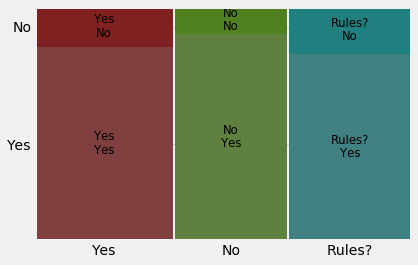

In [21]:
#Rules and likeliehood Mosaic
#m = df.groupby(['Rules','Likelihood']).sum()
mosaic(df, ["Rules", "Likelihood"])


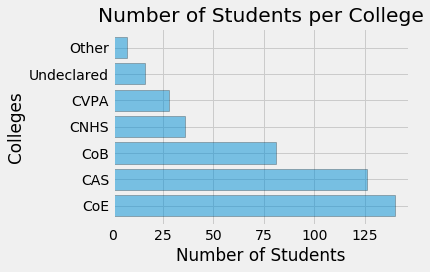

In [22]:
#Major Bar Graph
fig5, ax5 = plt.subplots()
x = df['Major'].value_counts().index.tolist()
y = df['Major'].value_counts().tolist()
ax5.barh(x, y, edgecolor='black', alpha=.5)


ax5.set_axisbelow(True)
ax5.set_ylabel('Colleges')
ax5.set_xlabel('Number of Students')
ax5.set_title('Number of Students per College')


plt.tight_layout()
plt.show()

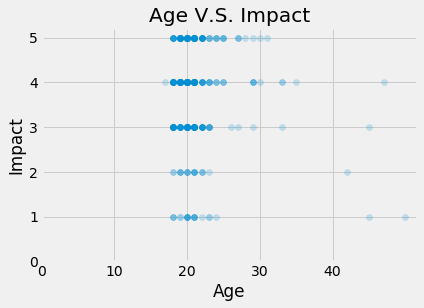

In [23]:
# Age V.S. Frequency Scatter Plot
plt.scatter(x=df['Age'],
            y=df['Habits'], alpha = 0.2)
plt.title('Age V.S. Impact')
plt.xticks(np.arange(0, 50, 10))
plt.yticks(np.arange(0, 6, 1))
plt.xlabel('Age')
plt.ylabel('Impact')
plt.show()

21
Sustainability;Ease of Access;Habit
3
21
Sustainability
4
21
Sustainability
6
21
Sustainability;Habit
7
19
Ease of Access;Habit
19
Habit
21
Habit
13
21
Ease of Access
15
21
Sustainability;Habit
16
21
Sustainability;Habit
17
21
Habit
20
21
Habit
25
21
Ease of Access
28
21
Sustainability
30
19
Ease of Access
19
Habit
21
Ease of Access;Habit
35
19
Sustainability
21
Ease of Access;Habit
39
21
Sustainability
40
19
Sustainability;Ease of Access;Habit
18
Sustainability;Habit
21
Sustainability
43
18
Sustainability;Habit
18
Ease of Access
21
Habit
48
18
Sustainability
21
Sustainability;Habit
52
18
Sustainability
19
Habit
19
Sustainability;Ease of Access;Habit
19
Sustainability;Ease of Access;Habit
19
Sustainability;Ease of Access;Habit
19
Habit
21
Ease of Access;Habit
64
18
Sustainability;Habit;It’s good for the environment 
19
Sustainability;Ease of Access;Habit
18
Sustainability
18
Sustainability
19
Sustainability;Ease of Access;Habit
19
Sustainability;Ease of Access;Habit
21
Sustainabilit

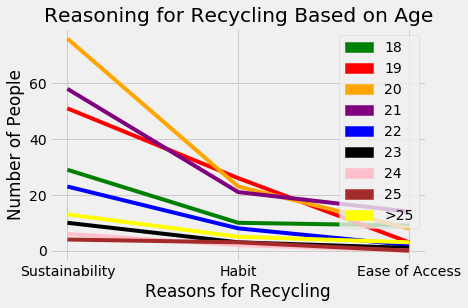

test


In [24]:
#HAHAHAHAHA
#print(df['Reasoning'][0])
#print(len(df['Age']))

#need num of people from ages 18-25 and 25+
#need how many people slected each for each age 

sus18 = 0
hab18 = 0
ease18 = 0
sus19= 0
hab19 = 0
ease19 = 0
sus20 = 0
hab20 = 0
ease20 = 0
sus21 = 0
hab21 = 0
ease21 = 0
sus22 = 0
hab22 = 0
ease22 = 0
sus23 = 0
hab23 = 0
ease23 = 0
sus24 = 0
hab24 = 0
ease24 = 0
sus25 = 0
hab25 = 0
ease25 = 0
sus25_plus = 0
hab25_plus = 0
ease25_plus = 0

for i in range (0, len(df['Age'])):
    if df['Age'][i] == 18:
        
        if 'Sustainability' in df['Reasoning'][i]:
            sus18+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab18+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease18+=1
            
    elif df['Age'][i] == 19:
        
        if 'Sustainability' in df['Reasoning'][i]:
            sus19+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab19+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease19+=1
            
    elif df['Age'][i] == 20:
        if 'Sustainability' in df['Reasoning'][i]:
            sus20+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab20+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease20+=1
            
    elif df['Age'][i] == 21:
        
        if 'Sustainability' in df['Reasoning'][i]:
            sus21+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab21+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease21+=1
        
    elif df['Age'][i] == 22:
        if 'Sustainability' in df['Reasoning'][i]:
            sus22+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab22+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease22+=1
        
    elif df['Age'][i] == 23:
        if 'Sustainability' in df['Reasoning'][i]:
            sus23+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab23+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease23+=1
        
    elif df['Age'][i] == 24:
        if 'Sustainability' in df['Reasoning'][i]:
            sus24+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab24+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease24+=1
        
    elif df['Age'][i] == 25:
        if 'Sustainability' in df['Reasoning'][i]:
            sus25+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab25+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease25+=1
        
    elif df['Age'][i] > 25:
        if 'Sustainability' in df['Reasoning'][i]:
            sus25_plus+=1
        elif 'Habit' in df['Reasoning'][i]:
            hab25_plus+=1
        elif 'Ease of Access' in df['Reasoning'][i]:
            ease25_plus+=1
        
       
x_labels = ['Sustainability', 'Habit', 'Ease of Access']

y_units_18 = [sus18, hab18, ease18]
y_units_19 = [sus19, hab19, ease19]
y_units_20 = [sus20, hab20, ease20]
y_units_21 = [sus21, hab21, ease21]
y_units_22 = [sus22, hab22, ease22]
y_units_23 = [sus23, hab23, ease23]
y_units_24 = [sus24, hab24, ease24]
y_units_25 = [sus25, hab25, ease25]
y_units_greater_25 = [sus25_plus, hab25_plus, ease25_plus]

plt.plot(y_units_18, color='green')
plt.plot(y_units_19, color='red')
plt.plot(y_units_20, color='orange')
plt.plot(y_units_21, color='purple')
plt.plot(y_units_22, color='blue')
plt.plot(y_units_23, color='black')
plt.plot(y_units_24, color='pink')
plt.plot(y_units_25, color='brown')
plt.plot(y_units_greater_25, color='yellow')

plt.title("Reasoning for Recycling Based on Age")

plt.xlabel('Reasons for Recycling')
plt.ylabel('Number of People')
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=0)

green_line = mpatches.Patch(color='green', label='18')
red_line = mpatches.Patch(color='red', label='19')
orange_line = mpatches.Patch(color='orange', label='20')
purple_line = mpatches.Patch(color='purple', label='21')
blue_line = mpatches.Patch(color='blue', label='22')
black_line = mpatches.Patch(color='black', label='23')
pink_line = mpatches.Patch(color='pink', label='24')
brown_line = mpatches.Patch(color='brown', label='25')
yellow_line = mpatches.Patch(color='yellow', label='>25')

plt.legend(handles=[green_line, red_line, orange_line, purple_line, blue_line, black_line, pink_line,brown_line, yellow_line])

plt.grid(True)
           
plt.show()

print("test")

[None, None, None, None, None, None, None, None]

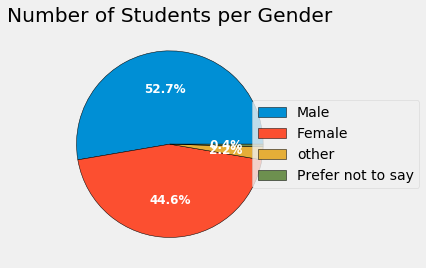

In [25]:
#Gender Pie Chart
fig6, ax6 = plt.subplots()
labels = df['Gender'].value_counts().index.tolist()

wedges, texts, autotexts = ax6.pie(df['Gender'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax6.set_title('Number of Students per Gender')

ax6.legend(loc="center right", bbox_to_anchor=(1, 0, 0.6, 1), labels= labels)
plt.setp(autotexts, size=12, weight="bold")

[None, None, None, None, None, None, None, None, None, None, None, None]

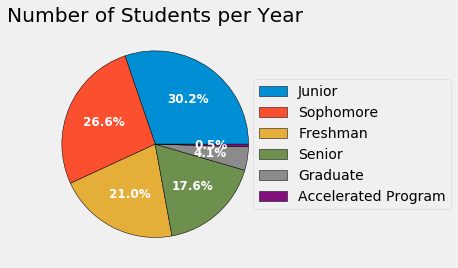

In [26]:
#year Pie Chart
fig7, ax7 = plt.subplots()
labels = df['Year'].value_counts().index.tolist()

wedges, texts, autotexts = ax7.pie(df['Year'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax7.set_title('Number of Students per Year')

ax7.legend(loc="center right", bbox_to_anchor=(1, 0, 0.8, 1), labels= labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0, 0.5, 'Age')

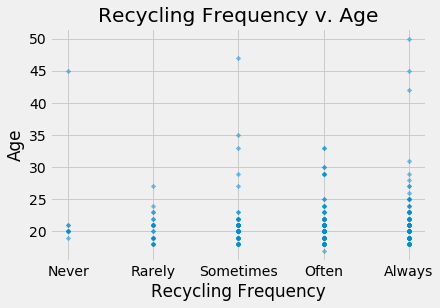

In [27]:
#Age v. Frequency Scatter plot
fig8, ax8 = plt.subplots()

ax8.scatter(df['Frequency_as_int'], df['Age'], marker='D', s=10, alpha=.5)
x_axis = ["","Never", "Rarely", "Sometimes", "Often", "Always"]
ax8.set_xticklabels(x_axis)
ax8.set_title('Recycling Frequency v. Age')
ax8.set_xlabel('Recycling Frequency')
ax8.set_ylabel('Age')

Junior                 134
Sophomore              118
Freshman                93
Senior                  78
Graduate                18
Accelerated Program      2
Name: Year, dtype: int64


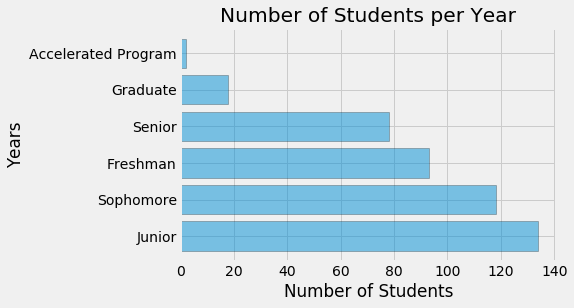

In [28]:
#Year Bar Graph
fig9, ax9 = plt.subplots()
x = df['Year'].value_counts().index.tolist()
y = df['Year'].value_counts().tolist()
ax9.barh(x, y, edgecolor='black', alpha=0.5)

ax9.set_axisbelow(True)
ax9.set_ylabel('Years')
ax9.set_xlabel('Number of Students')
ax9.set_title('Number of Students per Year')
print(df['Year'].value_counts())

Text(0.5, 1.0, 'Number of Students per Occupation')

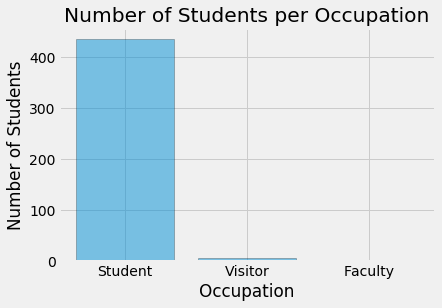

In [29]:
#Occupation Bar Graph
fig10, ax10 = plt.subplots()
x = df['Occupation'].value_counts().index.tolist()
y = df['Occupation'].value_counts().tolist()
#x = np.arange(6)
ax10.bar(x, y, edgecolor='black', alpha=0.5)

#ax9.set_xticklabels(('','Junior', 'Sophomore', 'Freshman', 'Senior', 'Graduate', 'Accelerated Program'))
ax10.set_axisbelow(True)
ax10.set_xlabel('Occupation')
ax10.set_ylabel('Number of Students')
ax10.set_title('Number of Students per Occupation')

[None, None, None, None, None, None]

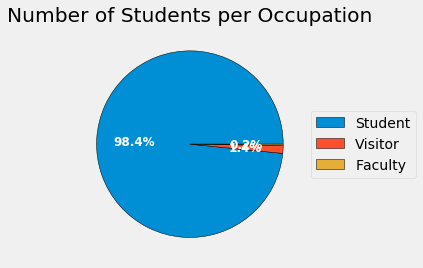

In [30]:
#Occupation Pie Chart
fig11, ax11 = plt.subplots()
labels = df['Occupation'].value_counts().index.tolist()

wedges, texts, autotexts = ax11.pie(df['Occupation'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax11.set_title('Number of Students per Occupation')

ax11.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students Living on Campus')

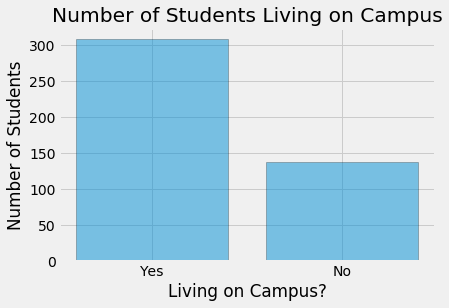

In [31]:
#Living On Campus? Bar Graph
fig12, ax12 = plt.subplots()
x = df['On Campus'].value_counts().index.tolist()
y = df['On Campus'].value_counts().tolist()
ax12.bar(x, y, edgecolor='black', alpha=0.5)

ax12.set_axisbelow(True)
ax12.set_xlabel('Living on Campus?')
ax12.set_ylabel('Number of Students')
ax12.set_title('Number of Students Living on Campus')

[None, None, None, None]

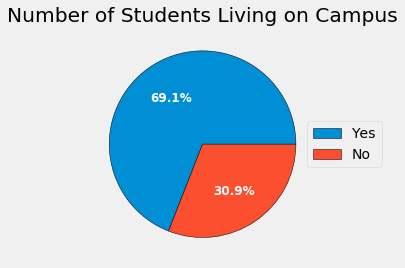

In [32]:
#Living On Campus? Pie Chart
fig13, ax13 = plt.subplots()
labels = df['On Campus'].value_counts().index.tolist()

wedges, texts, autotexts = ax13.pie(df['On Campus'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax13.set_title('Number of Students Living on Campus')

ax13.legend(loc="center right", bbox_to_anchor=(1, 0, 0.3, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students per Residence Hall')

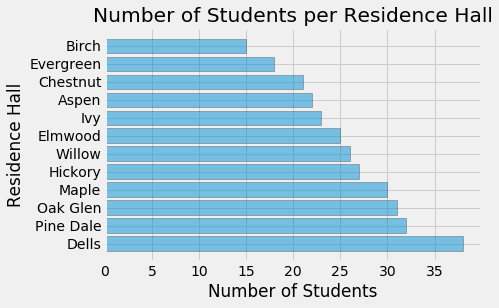

In [33]:
#Residence Hall Bar Graph 
fig14, ax14 = plt.subplots()
x = df['Location'].value_counts().index.tolist()
y = df['Location'].value_counts().tolist()
ax14.barh(x, y, edgecolor='black', alpha=0.5)

ax14.set_axisbelow(True)
ax14.set_ylabel('Residence Hall')
ax14.set_xlabel('Number of Students')
ax14.set_title('Number of Students per Residence Hall')

Text(0.5, 1.0, 'Students Who Think The Recycling Rules are Clear')

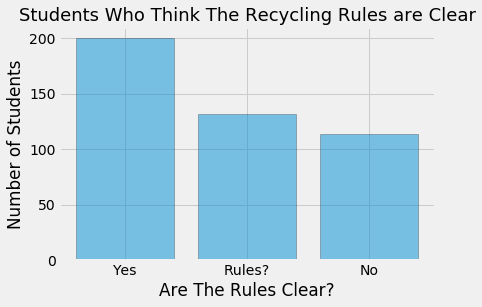

In [34]:
#Rules Bar Graph
fig15, ax15 = plt.subplots()
x = df['Rules'].value_counts().index.tolist()
y = df['Rules'].value_counts().tolist()
ax15.bar(x, y, edgecolor='black', alpha=0.5)

ax15.set_axisbelow(True)
ax15.set_xlabel('Are The Rules Clear?')
ax15.set_ylabel('Number of Students')
ax15.set_title('Students Who Think The Recycling Rules are Clear', fontsize=18)

[None, None, None, None, None, None]

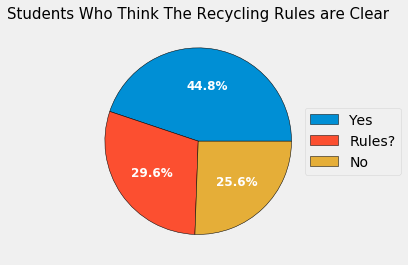

In [35]:
#Rules Pie Chart
fig16, ax16 = plt.subplots()
labels = df['Rules'].value_counts().index.tolist()

wedges, texts, autotexts = ax16.pie(df['Rules'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax16.set_title('Students Who Think The Recycling Rules are Clear', fontsize=15)

ax16.legend(loc="center right", bbox_to_anchor=(1, 0, 0.4, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, "Number of Students Who'd Be More Likely To Recycle")

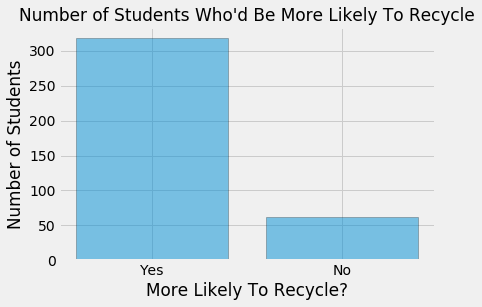

In [36]:
#Likelihood Bar Graph
fig17, ax17 = plt.subplots()
x = df['Likelihood'].value_counts().index.tolist()
y = df['Likelihood'].value_counts().tolist()
ax17.bar(x, y, edgecolor='black', alpha=0.5)

ax17.set_axisbelow(True)
ax17.set_xlabel('More Likely To Recycle?')
ax17.set_ylabel('Number of Students')
ax17.set_title("Number of Students Who'd Be More Likely To Recycle", fontsize=17)

[None, None, None, None]

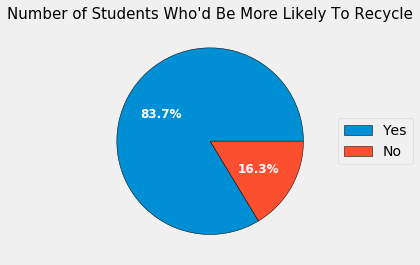

In [37]:
#Likelihood Pie Chart
fig18, ax18 = plt.subplots()
labels = df['Likelihood'].value_counts().index.tolist()

wedges, texts, autotexts = ax18.pie(df['Likelihood'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax18.set_title("Number of Students Who'd Be More Likely To Recycle", fontsize=15)

ax18.legend(loc="center right", bbox_to_anchor=(1, 0, 0.4, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students Who Look For The Recycling Symbol')

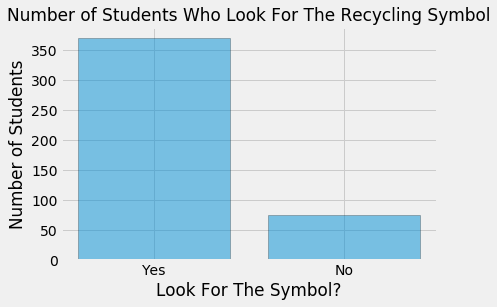

In [38]:
#Symbol Bar Graph
fig19, ax19 = plt.subplots()
x = df['Symbol'].value_counts().index.tolist()
y = df['Symbol'].value_counts().tolist()
ax19.bar(x, y, edgecolor='black', alpha=0.5)

ax19.set_axisbelow(True)
ax19.set_xlabel('Look For The Symbol?')
ax19.set_ylabel('Number of Students')
ax19.set_title("Number of Students Who Look For The Recycling Symbol", fontsize=17)

[None, None, None, None]

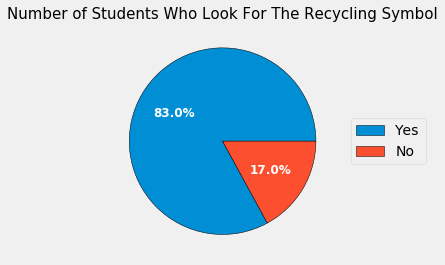

In [39]:
#Symbol Pie Chart
fig20, ax20 = plt.subplots()
labels = df['Symbol'].value_counts().index.tolist()

wedges, texts, autotexts = ax20.pie(df['Symbol'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax20.set_title('Number of Students Who Look For The Recycling Symbol', fontsize=15)
ax20.legend(loc="center right", bbox_to_anchor=(1, 0, 0.4, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students per Item')

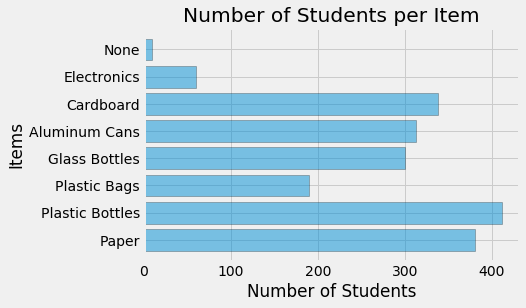

In [40]:
#Items Bar Graph
pl4 = df.Items.str.contains('Paper').sum()
pl5 = df.Items.str.contains('Plastic Bottles').sum()
pl6 = df.Items.str.contains('Plastic Bags').sum()
pl7 = df.Items.str.contains('Glass Bottles').sum()
pl8 = df.Items.str.contains('Aluminum Cans').sum()
pl9 = df.Items.str.contains('Cardboard').sum()
pl10 = df.Items.str.contains('Electronics').sum()
pl11 = df.Items.str.contains('None').sum()

fig21, ax21 = plt.subplots()
y = [pl4, pl5, pl6, pl7, pl8, pl9, pl10, pl11]
x = ['Paper', 'Plastic Bottles', 'Plastic Bags', 'Glass Bottles', 'Aluminum Cans', 'Cardboard', 'Electronics', 'None']
ax21.barh(x, y, edgecolor='black', alpha=0.5)
ax21.set_ylabel('Items')
ax21.set_xlabel('Number of Students')
ax21.set_title("Number of Students per Item")


Text(0.5, 1.0, 'Number of Students per Level of Thought')

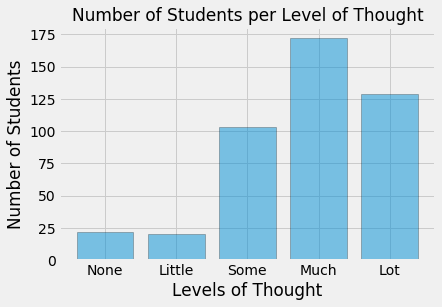

In [41]:
#Habits Bar Graph
fig22, ax22 = plt.subplots()
x = df['Habits'].value_counts().index.tolist()
y = df['Habits'].value_counts().tolist()
ax22.bar(x, y, edgecolor='black', alpha=0.5)

labels = ['', 'None', 'Little', 'Some', 'Much', 'Lot']
ax22.set_xticklabels(labels)
ax22.set_axisbelow(True)
ax22.set_xlabel('Levels of Thought')
ax22.set_ylabel('Number of Students')
ax22.set_title("Number of Students per Level of Thought", fontsize=17)

[None, None, None, None, None, None, None, None, None, None]

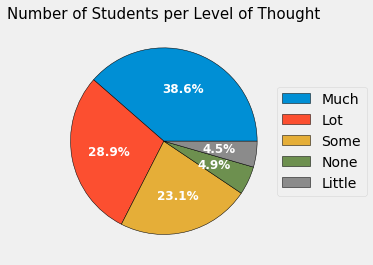

In [42]:
#Habits Pie Chart
fig24, ax24 = plt.subplots()
labels = df['Habits'].value_counts().index.tolist()

wedges, texts, autotexts = ax24.pie(df['Habits'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax24.set_title('Number of Students per Level of Thought', fontsize=15)
labels = ['Much', 'Lot', 'Some', 'None', 'Little']
ax24.legend(loc="center right", bbox_to_anchor=(1, 0, 0.4, 1), labels=labels)
plt.setp(autotexts, size=12, weight="bold")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

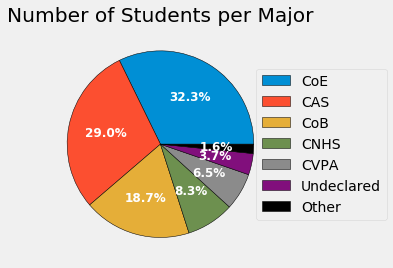

In [43]:
#Major's Pie Chart
fig23, ax23 = plt.subplots()
labels = df['Major'].value_counts().index.tolist()

wedges, texts, autotexts = ax23.pie(df['Major'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax23.set_title('Number of Students per Major')

ax23.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), labels= labels)
plt.setp(autotexts, size=12, weight="bold")


In [ ]:
#hypothesis #1 code by Banes Michael Egan 
#hypothesis #1 The mean recycling frequency for upperclassmen is greater than or equal to  the overall mean 

upperClassmenNum = 0
upperClasstotal = 0
upperClassArr = []

for i in range (0, len(df['Year'])):
    
    if df['Year'][i] == 'Senior':
        upperClassmenNum+=1
        upperClasstotal += df['Frequency_as_int'][i]
        upperClassArr.append(df['Frequency_as_int'][i])
    
    elif df['Year'][i] == 'Junior':
        upperClassmenNum+=1
        upperClasstotal += df['Frequency_as_int'][i]
        upperClassArr.append(df['Frequency_as_int'][i])
    
sqrtUpClass = math.sqrt(upperClassmenNum)
sample_std_div = np.std(upperClassArr)
upperClassMean = upperClasstotal/upperClassmenNum 

zee = (upperClassMean - frequency_mean)/(sample_std_div / sqrtUpClass)
 
print("Total Frequency Mean")
print(frequency_mean)
print()

print("Upper Class Mean")
print(upperClassMean)
print()

print("standard devation of sample distribution")
print(sample_std_div)
print()

print("zee")
print(zee)

In [ ]:
#Hypothesis #2 The mean recycling frequency for upperclassmen is less than the overall mean
#this code was brought to you by BanesTM and viewers like you 

totalAge = 0
totalNotKnow = 0
totalNotKnowAge = 0
notKnowAgeArr = []
y = 0
sampleAgeStanDev = 0

for i in range (0, len(df['Age'])): 
    
    totalAge+=df['Age'][i]
    
totalAvgAge = totalAge/len(df['Age'])

for i in range (0, len(df['Rules'])):
    
    if "I didn't know there were any recycling rules!" in df['Rules'][i]:
        
        totalNotKnowAge+=df['Age'][i]
        notKnowAgeArr.append(df['Age'][i])
        y += 1

sampleAgeStanDev = np.std(notKnowAgeArr)

notKnowAvgAge =  totalNotKnowAge/len(notKnowAgeArr)

notKnowSqrRt = math.sqrt(len(notKnowAgeArr))

zee = (notKnowAvgAge - totalAvgAge)/(sampleAgeStanDev / notKnowSqrRt)

print()
print(notKnowAvgAge)
print()
print(sampleAgeStanDev)
print()

print('zee')
print(zee)